### Loading the saved data&target

In [2]:
import numpy as np

data=np.load('dataChestXray.npy')
target=np.load('targetChestXray.npy')
print(data.shape[1:])

(128, 128, 1)


### CNN Architecture

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Splliting the data and target

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

### Training the dataset

In [5]:
history=model.fit(train_data,train_target,epochs=8)

Epoch 1/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.7103 - loss: 0.6007
Epoch 2/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.8740 - loss: 0.2944
Epoch 3/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9249 - loss: 0.2092
Epoch 4/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9338 - loss: 0.1794
Epoch 5/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9378 - loss: 0.1641
Epoch 6/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9475 - loss: 0.1467
Epoch 7/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9397 - loss: 0.1557
Epoch 8/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9526 - loss: 0.1342


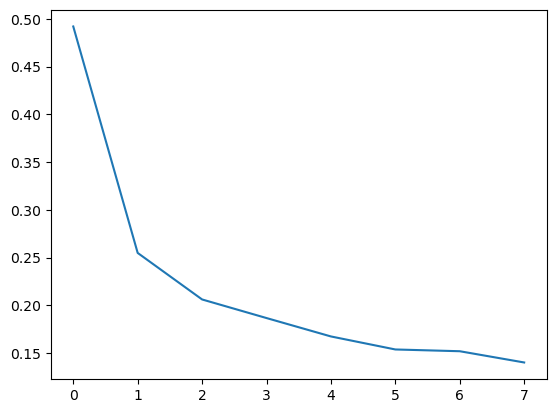

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

[0.7793236374855042, 0.8959760069847107, 0.9250856041908264, 0.9327911138534546, 0.9375, 0.9439212083816528, 0.9441352486610413, 0.9490582346916199]
0.9490582346916199


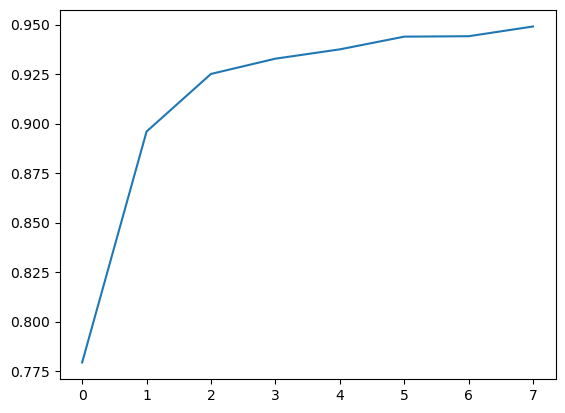

In [7]:
plt.plot(history.history['accuracy'])
a = history.history['accuracy']
print(a)
print(a[-1])


In [8]:
print(model.evaluate(test_data,test_target))

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9567 - loss: 0.1297
[0.1418115794658661, 0.948630154132843]


### Saving the model

In [9]:
model.save("Pnemonia_predictions_using_chest_xray_99.20.keras")